# Wczytanie danych z pliku CSV

In [1]:
import pandas as pd

klienci = pd.read_csv('data/klienci.csv')
klienci

,klientID,plec,wiek,roczny_dochod,wskaznik_wydatkow
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<Axes: xlabel='roczny_dochod', ylabel='wskaznik_wydatkow'>

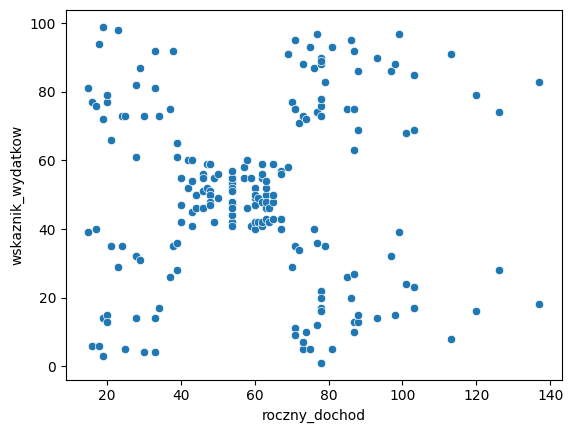

In [3]:
import seaborn as sns

sns.scatterplot(x = klienci['roczny_dochod'], y = klienci['wskaznik_wydatkow'])

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = klienci[['roczny_dochod', 'wskaznik_wydatkow']]
z = scaler.fit_transform(x)
z

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

grupa_kmeans
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

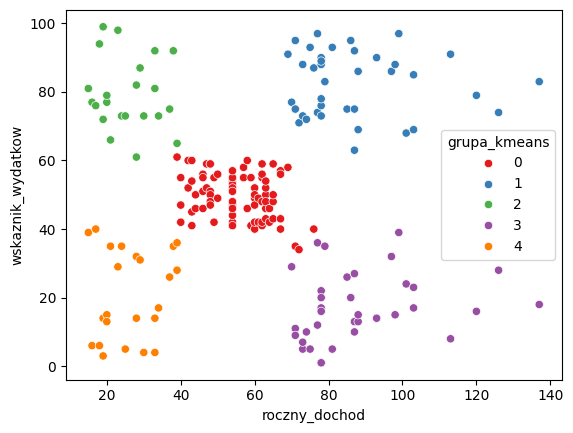

In [27]:
from sklearn.cluster import KMeans

group_kmeans = KMeans(n_clusters=5, random_state=42)
cluster_kmeans = group_kmeans.fit_predict(z)
cluster_kmeans

klienci['grupa_kmeans'] = cluster_kmeans
sns.scatterplot(x = klienci['roczny_dochod'], y = klienci['wskaznik_wydatkow'], hue = klienci['grupa_kmeans'], palette = 'Set1')
klienci["grupa_kmeans"].value_counts()

In [28]:
klienci[["roczny_dochod", "wskaznik_wydatkow", "grupa_kmeans"]].groupby("grupa_kmeans").mean()

,roczny_dochod,wskaznik_wydatkow
grupa_kmeans,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [30]:
from sklearn.metrics import calinski_harabasz_score

inertia = []
ch_scores = []

for i in range(2,11):
    group_kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_kmeans = group_kmeans.fit_predict(z)
    inertia.append(group_kmeans.inertia_) # suma kwadratów odległości obiektów od środka klastra
    ch_scores.append(calinski_harabasz_score(z, cluster_kmeans)) # wskaźnik Calinskiego-Harabasza

print(inertia)
print(ch_scores)

[273.66888662642015, 157.70400815035947, 109.22822707921345, 65.56840815571681, 60.13287487193422, 49.66824483736798, 37.31912287833883, 32.49508119910091, 30.059322694042205]
[np.float64(91.40081927586573), np.float64(151.3351212635948), np.float64(173.9210611775394), np.float64(248.64932001536357), np.float64(219.29509412369103), np.float64(226.88550457064687), np.float64(266.5608829108479), np.float64(270.01563352345875), np.float64(259.8148608542566)]


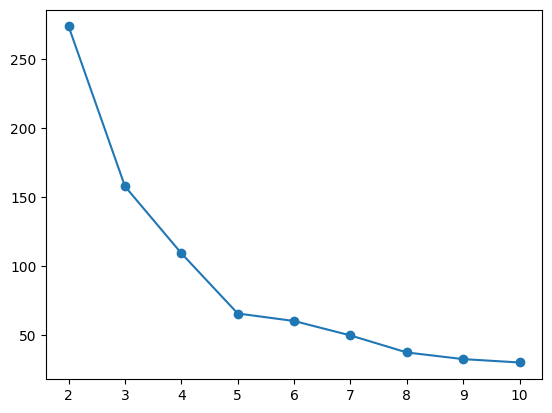

In [31]:
import matplotlib.pyplot as plt

plt.plot(range(2,11), inertia, marker='o')

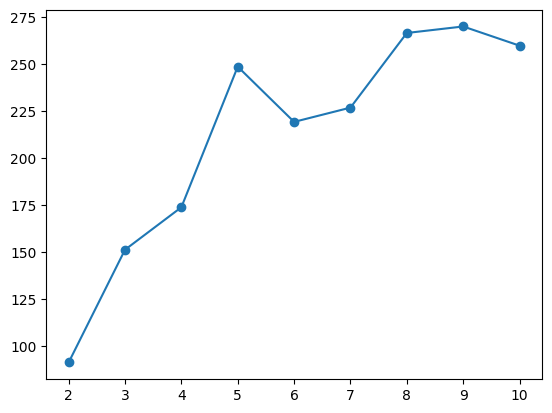

In [32]:
plt.plot(range(2,11), ch_scores, marker='o')

# Zadanie

In [33]:
auta = pd.read_csv("data/auta.csv", sep=";")
auta

,nr,marka,model,pojemnosc,przebieg,lata,cena,diesel
0,1,Fiat,Fiat Seicento ...,899,52000,5,9500,0
1,2,Volkswagen,Volkswagen Corrado ...,2000,188000,12,15900,0
2,4,Ford,Ford Focus Combi ...,1800,125000,5,27900,1
3,5,Opel,Opel Vectra ...,1800,148000,9,16600,0
4,7,Citroen,Citroen Xsara II ...,1400,70000,5,20000,0
5,8,Toyota,Toyota Avensis ...,1600,105000,6,27500,0
6,9,BMW,BMW 320 ...,2000,164000,11,15600,0
7,10,Peugeot,Peugeot 206 ...,1124,72000,6,16000,0
8,11,Volkswagen,Volkswagen Golf IV ...,1400,52000,3,26500,0
9,12,Audi,Audi A3 ...,1600,108000,5,34000,0


Wysoka korelacja (powyżej 0,9) między cechami może sugerować, że są one redundantne i nie wnoszą dodatkowej informacji do procesu grupowania.

In [34]:
auta[["pojemnosc", "przebieg", "lata", "cena"]].corr()

,pojemnosc,przebieg,lata,cena
pojemnosc,1.000000,0.721918,0.360621,0.351001
przebieg,0.721918,1.000000,0.642138,-0.063452
lata,0.360621,0.642138,1.000000,-0.601429
cena,0.351001,-0.063452,-0.601429,1.000000


Sprawdzenie zmienności cech przed grupowaniem za pomocą współczynnika zmienności (odchylenie standardowe podzielone przez średnią) - cechy o wysokiej zmienności mogą być bardziej istotne w procesie grupowania od takich o niskiej zmienności (np. poniżej 5%).

In [35]:
auta[["pojemnosc", "przebieg", "lata", "cena"]].std()/auta[["pojemnosc", "przebieg", "lata", "cena"]].mean()

pojemnosc    0.198106
przebieg     0.361838
lata         0.359148
cena         0.400801
dtype: float64

In [36]:
x_auta = auta[["pojemnosc", "przebieg", "lata", "cena"]]
scaler_auta = StandardScaler()
z_auta = scaler_auta.fit_transform(x_auta)

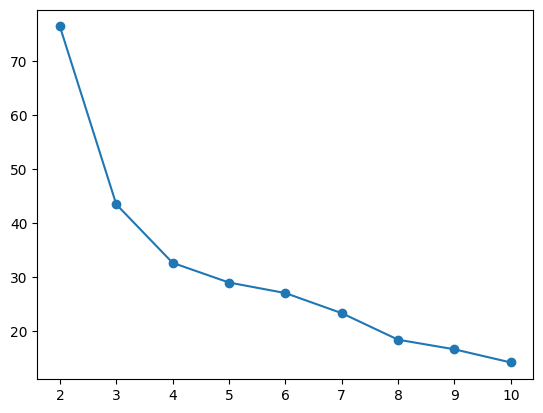

In [37]:
inertia_auta = []
ch_scores_auta = []
for i in range(2, 11):
    kmeans_auta = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clusters_kmeans_auta = kmeans_auta.fit_predict(z_auta)
    inertia_auta.append(kmeans_auta.inertia_)
    ch_scores_auta.append(calinski_harabasz_score(z_auta, clusters_kmeans_auta))

plt.plot(range(2, 11), inertia_auta, marker='o') 

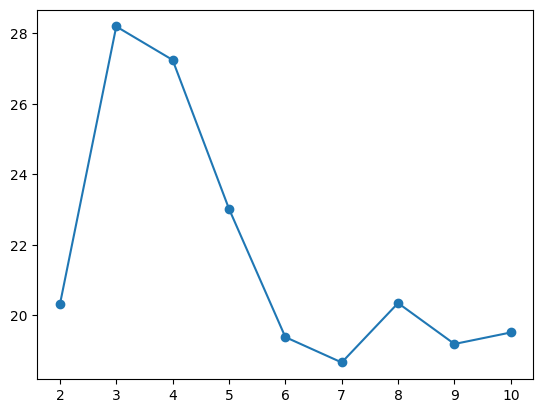

In [38]:
plt.plot(range(2, 11), ch_scores_auta, marker='o')

In [39]:
auta["clusters_kmeans"] = KMeans(n_clusters=3, init='k-means++', random_state=42).fit_predict(z_auta)
auta[["pojemnosc", "przebieg", "lata", "cena", "clusters_kmeans"]].groupby("clusters_kmeans").mean()

,pojemnosc,przebieg,lata,cena
clusters_kmeans,,,,
0,1226.909091,71327.272727,5.727273,14727.181818
1,1674.100000,160800.000000,9.900000,12940.000000
2,1690.909091,124363.636364,5.363636,25963.636364


# Grupowanie hierarchiczne

<Axes: xlabel='roczny_dochod', ylabel='wskaznik_wydatkow'>

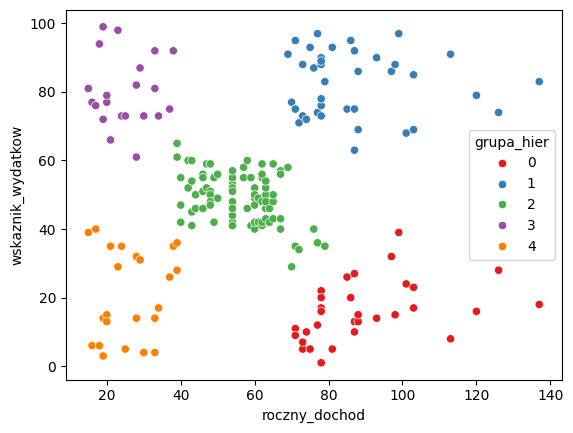

In [49]:
from sklearn.cluster import AgglomerativeClustering

group_hier = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_hier = group_hier.fit_predict(z)
cluster_hier

klienci['grupa_hier'] = cluster_hier
sns.scatterplot(x = klienci['roczny_dochod'], y = klienci['wskaznik_wydatkow'], hue = klienci['grupa_hier'], palette = 'Set1')

Dendrogram

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [35.0, 35.0, 54.375, 54.375],
  [12.5, 12.5, 44.6875, 44.6875],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [142.5, 142.5, 170.0, 170.0],
  [125.0, 125.0, 156.25, 156.25],
  [185.0, 185.0, 195.0, 195.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [190.0, 190.0, 212.5, 212.5],
  [140.625, 140.625, 201.25, 201.25],
  [102.5, 102.5, 170.9375, 170.9375],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [282.5, 282.5, 312.5, 312.5],
  [250.0, 250.0, 297.5, 297.5],
  [335.0, 335.0, 345.0, 345.0],
  [355.0

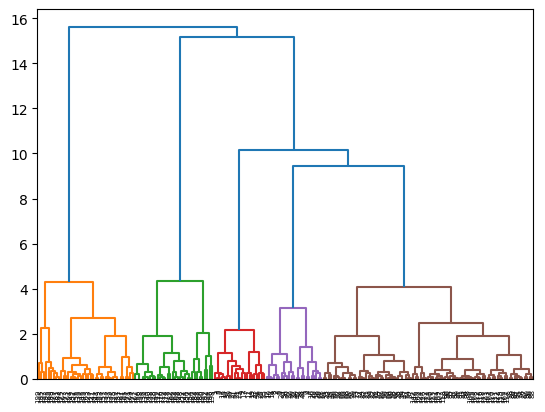

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(z, method='ward')

dendrogram(linked, color_threshold=5)

## Zadanie

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [20.0, 20.0, 50.0, 50.0],
  [5.0, 5.0, 35.0, 35.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [20.0, 20.0, 82.5, 82.5],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [160.0, 160.0, 182.5, 182.5],
  [121.25, 121.25, 171.25, 171.25],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [272.5, 272.5, 302.5, 302.5],
  [242.5, 242.5, 287.5, 287.5],
  [212.5, 212.5, 265.0, 265.0],
  [146.25, 146.25, 238.75, 238.75],
  [51.25, 51.25, 192.5, 192.5]],
 'dcoord': [[0.0,
   np.flo

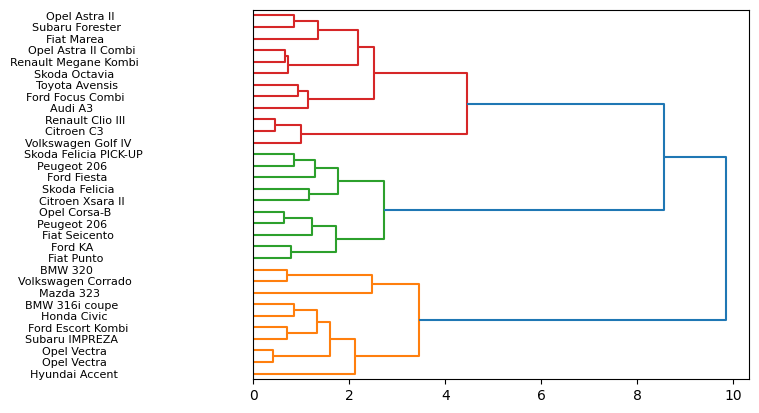

In [66]:
auta_linked = linkage(z_auta, method='ward')

dendrogram(auta_linked, orientation='right', color_threshold=5, labels=auta['model'].values)

In [67]:
group_hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
auta["clusters_hier"] = group_hier.fit_predict(z_auta)

auta[["pojemnosc", "przebieg", "lata", "cena", "clusters_hier"]].groupby("clusters_hier").mean()

,pojemnosc,przebieg,lata,cena
clusters_hier,,,,
0,1666.666667,118333.333333,5.166667,26008.333333
1,1674.100000,160800.000000,9.900000,12940.000000
2,1209.600000,73260.000000,6.000000,13549.900000


# Redukcja wymiarowości

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
z_pca = pca.fit_transform(z_auta)
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.54784079 0.3751816 ]


np.float64(0.9230223931128255)

<Axes: >

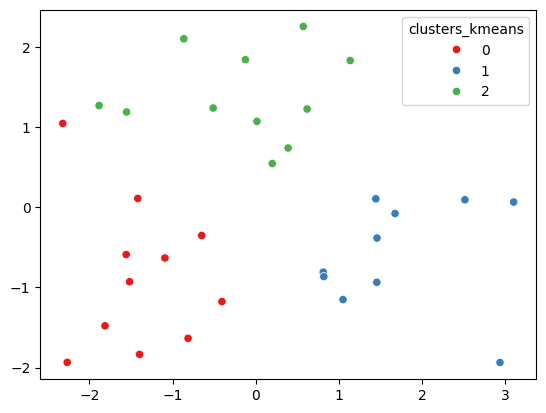

In [74]:
sns.scatterplot(x=z_pca[:, 0], y=z_pca[:, 1], hue=auta['clusters_kmeans'], palette='Set1')

In [75]:
pca = PCA(n_components=2)
z_pca = pca.fit_transform(z)
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.50495142 0.49504858]


np.float64(1.0)

<Axes: >

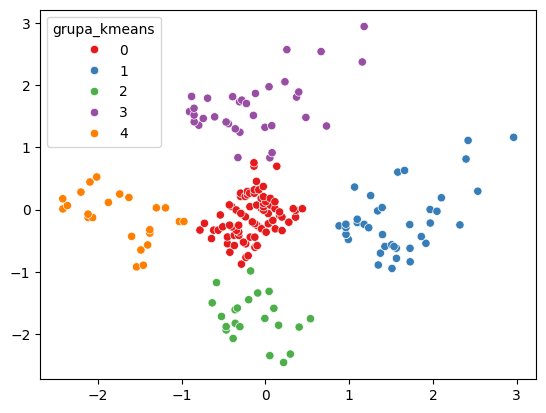

In [76]:
sns.scatterplot(x=z_pca[:, 0], y=z_pca[:, 1], hue=klienci['grupa_kmeans'], palette='Set1')

In [ ]:
! pip install umap-learn

d:\CDV\mad_gr1\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

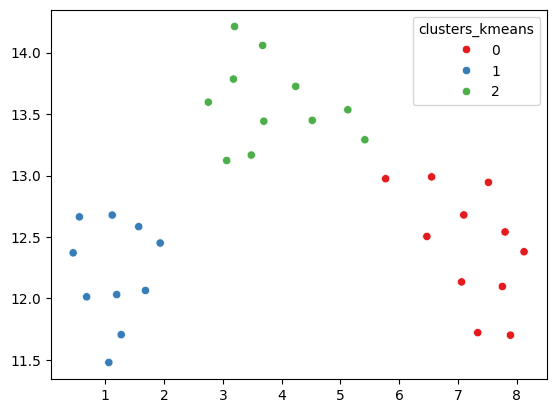

In [84]:
from umap import UMAP

umap = UMAP(n_components=2)
z_umap = umap.fit_transform(z_auta)

sns.scatterplot(x=z_umap[:, 0], y=z_umap[:, 1], hue=auta['clusters_kmeans'], palette='Set1')